In [18]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [19]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [20]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)


In [21]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [22]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

616

In [23]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [24]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=df7e1a45d4925410a8ba4c0d3e685ca0


In [25]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [39]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.  Record numbers 1-50 and the set counter - how many sets of 50
record_count = 1
set_count = 1

# Loop through all the cities in our list.
#for i in range(len(cities)):

#Group cities in sets of 50 for logging purposes.
#   if (i % 50 == 0 and i >= 50):
#       set_count += 1
#       record_count = 1
# Create endpoint URL with each city.
#   city_url = url + "&q=" + "i"
    
#i uses the indexing in the cities_list so have to create another for loop to get the city from the cities list
#enumerate method
# Loop through all the cities in the list.

for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes. 
    #If the remainder of the index divided by 50 ==0 and if the index is greater than or equal to 50
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        
      
    # Create endpoint URL with each city.  replace blanks with "+" which finds the weather for the city
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | jamestown
Processing Record 2 of Set 1 | saleaula
City not found. Skipping...
Processing Record 3 of Set 1 | saint george
Processing Record 4 of Set 1 | lazaro cardenas
Processing Record 5 of Set 1 | sitka
Processing Record 6 of Set 1 | chicama
Processing Record 7 of Set 1 | olafsvik
Processing Record 8 of Set 1 | vaini
Processing Record 9 of Set 1 | hobart
Processing Record 10 of Set 1 | shingu
Processing Record 11 of Set 1 | cabedelo
Processing Record 12 of Set 1 | ribeira grande
Processing Record 13 of Set 1 | tasiilaq
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | klyuchi
Processing Record 16 of Set 1 | busselton
Processing Record 17 of Set 1 | yellowknife
Processing Record 18 of Set 1 | monrovia
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | cape town
Processing Record 21 of Set 1 | tuggurt
City not found. Skipping...
Processing Record 22 of 

Processing Record 38 of Set 4 | itarema
Processing Record 39 of Set 4 | khatanga
Processing Record 40 of Set 4 | grindavik
Processing Record 41 of Set 4 | babina
Processing Record 42 of Set 4 | bengkulu
Processing Record 43 of Set 4 | buraydah
Processing Record 44 of Set 4 | faanui
Processing Record 45 of Set 4 | finschhafen
Processing Record 46 of Set 4 | lavrentiya
Processing Record 47 of Set 4 | kon tum
Processing Record 48 of Set 4 | mao
Processing Record 49 of Set 4 | vitkov
Processing Record 50 of Set 4 | marsh harbour
Processing Record 1 of Set 5 | port macquarie
Processing Record 2 of Set 5 | kurtamysh
Processing Record 3 of Set 5 | warqla
City not found. Skipping...
Processing Record 4 of Set 5 | guerrero negro
Processing Record 5 of Set 5 | kazalinsk
City not found. Skipping...
Processing Record 6 of Set 5 | bambanglipuro
Processing Record 7 of Set 5 | zhigansk
Processing Record 8 of Set 5 | mys shmidta
City not found. Skipping...
Processing Record 9 of Set 5 | caravelas
Proc

Processing Record 29 of Set 8 | nago
Processing Record 30 of Set 8 | iepuresti
Processing Record 31 of Set 8 | andra
Processing Record 32 of Set 8 | baoning
Processing Record 33 of Set 8 | santa isabel do rio negro
Processing Record 34 of Set 8 | bhuj
Processing Record 35 of Set 8 | ngukurr
City not found. Skipping...
Processing Record 36 of Set 8 | pilar
Processing Record 37 of Set 8 | kimbe
Processing Record 38 of Set 8 | kahului
Processing Record 39 of Set 8 | torbay
Processing Record 40 of Set 8 | andenes
Processing Record 41 of Set 8 | mega
Processing Record 42 of Set 8 | natal
Processing Record 43 of Set 8 | saint-pierre
Processing Record 44 of Set 8 | sri aman
Processing Record 45 of Set 8 | allapalli
Processing Record 46 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 47 of Set 8 | fatehpur sikri
Processing Record 48 of Set 8 | kununurra
Processing Record 49 of Set 8 | vastervik
City not found. Skipping...
Processing Record 50 of Set 8 | mount gambier
Processi

Processing Record 15 of Set 12 | kenai
Processing Record 16 of Set 12 | tabas
Processing Record 17 of Set 12 | tocopilla
Processing Record 18 of Set 12 | la palma
Processing Record 19 of Set 12 | san vicente
Processing Record 20 of Set 12 | elk city
Processing Record 21 of Set 12 | japura
Processing Record 22 of Set 12 | ponta delgada
Processing Record 23 of Set 12 | jesus maria
Processing Record 24 of Set 12 | skibotn
Processing Record 25 of Set 12 | kaniama
Processing Record 26 of Set 12 | tignere
Processing Record 27 of Set 12 | dicabisagan
Processing Record 28 of Set 12 | chadiza
Processing Record 29 of Set 12 | gilgit
Processing Record 30 of Set 12 | kattivakkam
Processing Record 31 of Set 12 | bayji
Processing Record 32 of Set 12 | saint-denis
Processing Record 33 of Set 12 | kashi
Processing Record 34 of Set 12 | bedford
Processing Record 35 of Set 12 | galle
Processing Record 36 of Set 12 | pokhara
Processing Record 37 of Set 12 | mocambique
City not found. Skipping...
Processi

In [40]:
len(city_data)


559

In [59]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Jamestown,42.10,-79.24,53.01,93,90,8.05,US,2020-10-20 01:17:49
1,Saint George,37.10,-113.58,80.60,11,1,11.41,US,2020-10-20 01:17:50
2,Lazaro Cardenas,17.96,-102.20,81.41,85,52,4.56,MX,2020-10-20 01:17:50
3,Sitka,57.05,-135.33,44.60,81,75,9.17,US,2020-10-20 01:17:50
4,Chicama,-7.84,-79.15,63.32,80,2,7.11,PE,2020-10-20 01:17:50
5,Olafsvik,64.89,-23.71,38.73,74,92,6.51,IS,2020-10-20 01:17:50
6,Vaini,-21.20,-175.20,77.00,69,40,12.75,TO,2020-10-20 01:15:34
7,Hobart,-42.88,147.33,66.00,58,40,6.93,AU,2020-10-20 01:16:01
8,Shingu,33.73,135.98,66.20,55,40,4.70,JP,2020-10-20 01:17:51
9,Cabedelo,-6.98,-34.83,73.40,88,20,4.70,BR,2020-10-20 01:17:51


In [66]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

#assign the same dataframe to new column order

city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Jamestown,US,2020-10-20 01:17:49,42.10,-79.24,53.01,93,90,8.05
1,Saint George,US,2020-10-20 01:17:50,37.10,-113.58,80.60,11,1,11.41
2,Lazaro Cardenas,MX,2020-10-20 01:17:50,17.96,-102.20,81.41,85,52,4.56
3,Sitka,US,2020-10-20 01:17:50,57.05,-135.33,44.60,81,75,9.17
4,Chicama,PE,2020-10-20 01:17:50,-7.84,-79.15,63.32,80,2,7.11
5,Olafsvik,IS,2020-10-20 01:17:50,64.89,-23.71,38.73,74,92,6.51
6,Vaini,TO,2020-10-20 01:15:34,-21.20,-175.20,77.00,69,40,12.75
7,Hobart,AU,2020-10-20 01:16:01,-42.88,147.33,66.00,58,40,6.93
8,Shingu,JP,2020-10-20 01:17:51,33.73,135.98,66.20,55,40,4.70
9,Cabedelo,BR,2020-10-20 01:17:51,-6.98,-34.83,73.40,88,20,4.70


In [68]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [71]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [72]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'10/19/20'

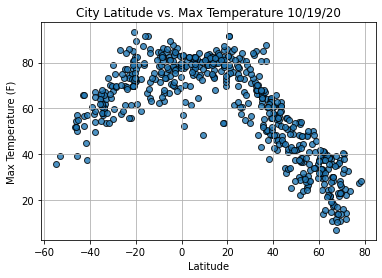

In [73]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

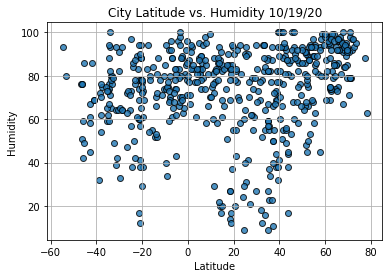

In [74]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

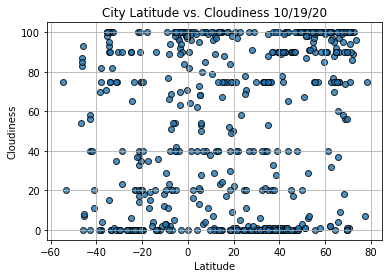

In [75]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

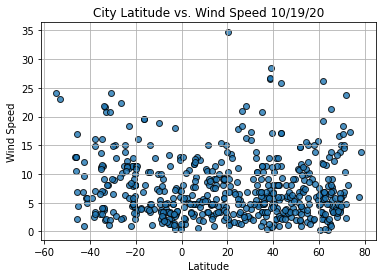

In [77]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()